<a href="https://colab.research.google.com/github/nataliacamargoz/Workbuddy-Python/blob/main/workbuddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def coletar_registros():
    registros = []
    opcoes_validas = ["pausa", "pomodoro", "alongamento", "foco"]

    print("=== WorkBuddy | Registro de Sessões ===\n")

    while True:
        # validação do tipo de sessão
        while True:
            tipo = input("Tipo de sessão (pausa/pomodoro/alongamento/foco): ").lower()
            if tipo in opcoes_validas:
                break
            print("❌ Sessão inválida! Tente novamente.")

        duracao = float(input("Duração em minutos: "))
        bem_estar = int(input("Nível de bem-estar (1 a 5): "))

        registros.append({
            "Tipo_Sessao": tipo.capitalize(),
            "Duracao": duracao,
            "Bem_Estar": bem_estar
        })

        continuar = input("Registrar outra sessão? (s/n): ").lower()
        if continuar != "s":
            break

    return registros


In [46]:
def criar_dataframe(registros):
    df = pd.DataFrame(registros)
    print("\n=== DataFrame Criado ===")
    print(df)
    return df


In [47]:
def relatorio_simples(df):
    print("\n=== RELATÓRIO SIMPLES ===")
    print(f"Total de sessões registradas: {len(df)}")
    print(f"Total de minutos registrados: {df['Duracao'].sum()} min")
    print(f"Média de bem-estar: {df['Bem_Estar'].mean():.2f}")


In [48]:
def relatorio_avancado(df):

    def total_minutos():
        return df["Duracao"].sum()

    def media_bem_estar():
        return df["Bem_Estar"].mean()

    def avaliar_status(media):
        if media >= 4:
            return "Excelente! Seu bem-estar no trabalho está muito positivo."
        elif media >= 3:
            return "Bom! Continue equilibrando pausas e foco."
        elif media >= 2:
            return "Atenção: você pode estar entrando em exaustão."
        else:
            return "Crítico: tente reorganizar sua rotina urgentemente."

    minutos = total_minutos()
    media = media_bem_estar()
    status = avaliar_status(media)

    print("\n📊 === RELATÓRIO AVANÇADO ===")
    print(f"Total de minutos registrados: {minutos} min")
    print(f"Média geral de bem-estar: {media:.2f}")
    print(f"Status geral: {status}")


In [49]:
def gerar_graficos(df):

    # Gráfico 1 — Tempo por Tipo de Sessão
    plt.figure(figsize=(8,5))
    df.groupby("Tipo_Sessao")["Duracao"].sum().plot(kind="bar")
    plt.title("Tempo Total por Tipo de Sessão")
    plt.xlabel("Tipo de Sessão")
    plt.ylabel("Duração Total (min)")
    plt.xticks(rotation=0)
    plt.show()

    # Gráfico 2 — Média de bem-estar por sessão
    plt.figure(figsize=(8,5))
    df.groupby("Tipo_Sessao")["Bem_Estar"].mean().plot(kind="bar")
    plt.title("Média de Bem-Estar por Sessão")
    plt.xlabel("Tipo de Sessão")
    plt.ylabel("Nível Médio de Bem-Estar")
    plt.ylim(0, 5)
    plt.xticks(rotation=0)
    plt.show()

    # Gráfico 3 — Evolução do Bem-Estar
    plt.figure(figsize=(8,5))
    plt.plot(df.index, df["Bem_Estar"], marker="o")
    plt.title("Evolução do Bem-Estar ao Longo dos Registros")
    plt.xlabel("Registro")
    plt.ylabel("Bem-Estar (1 a 5)")
    plt.ylim(0, 5)
    plt.show()


=== WorkBuddy | Registro de Sessões ===

Tipo de sessão (pausa/pomodoro/alongamento/foco): pausa
Duração em minutos: 60
Nível de bem-estar (1 a 5): 3
Registrar outra sessão? (s/n): s
Tipo de sessão (pausa/pomodoro/alongamento/foco): pomodoro
Duração em minutos: 10
Nível de bem-estar (1 a 5): 4
Registrar outra sessão? (s/n): s
Tipo de sessão (pausa/pomodoro/alongamento/foco): alongamento
Duração em minutos: 5
Nível de bem-estar (1 a 5): 4
Registrar outra sessão? (s/n): s
Tipo de sessão (pausa/pomodoro/alongamento/foco): foco
Duração em minutos: 60
Nível de bem-estar (1 a 5): 4
Registrar outra sessão? (s/n): n

=== DataFrame Criado ===
   Tipo_Sessao  Duracao  Bem_Estar
0        Pausa     60.0          3
1     Pomodoro     10.0          4
2  Alongamento      5.0          4
3         Foco     60.0          4

=== RELATÓRIO SIMPLES ===
Total de sessões registradas: 4
Total de minutos registrados: 135.0 min
Média de bem-estar: 3.75

📊 === RELATÓRIO AVANÇADO ===
Total de minutos registrados:

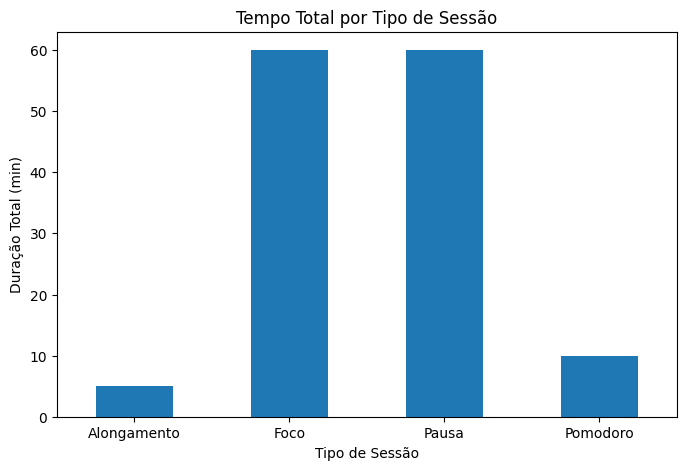

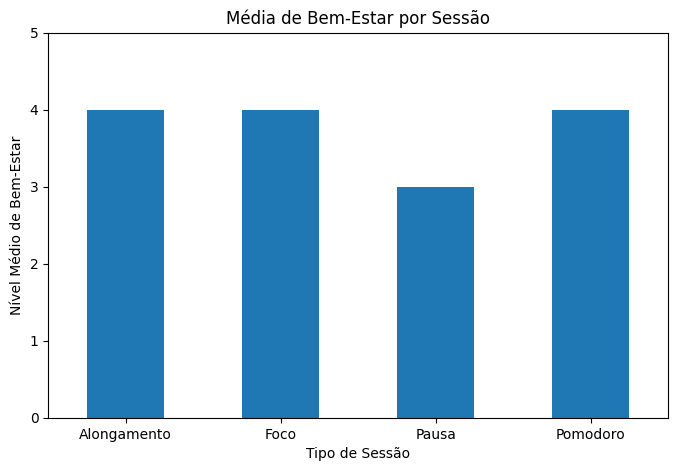

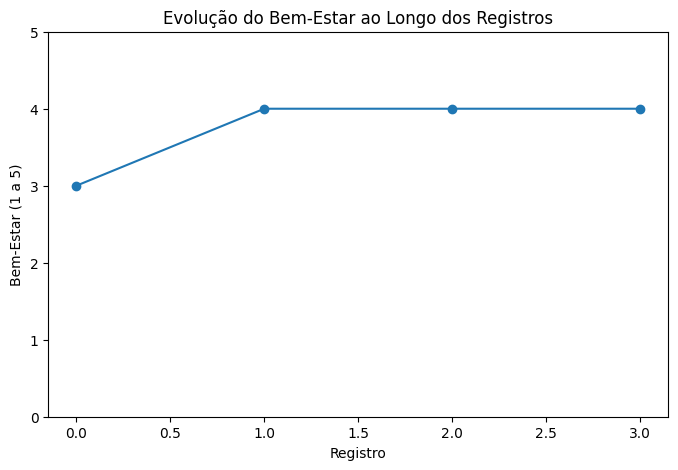

In [50]:
def main():
    registros = coletar_registros()
    df = criar_dataframe(registros)
    relatorio_simples(df)
    relatorio_avancado(df)
    gerar_graficos(df)

main()
